In [82]:
import numpy as np
import pandas as pd

data_dir = "../LlenguaCatalana/Dades/"

Barcelona = pd.read_csv(data_dir + "Barcelona.csv", delimiter=";", header = 17)
Girona = pd.read_csv(data_dir + "ComarquesGironines.csv", delimiter=";", header = 17)
Central = pd.read_csv(data_dir + "ComarquesCentrals.csv", delimiter=";", header = 17)
Pirineu = pd.read_csv(data_dir + "AltPirineu&Aran.csv", delimiter=";", header = 17)
Tarragona = pd.read_csv(data_dir + "CampDeTarragona.csv", delimiter=";", header = 17)
Ponent = pd.read_csv(data_dir + "Ponent.csv", delimiter=";", header = 17)
Ebre = pd.read_csv(data_dir + "TerresDeL'Ebre.csv", delimiter=";", header = 17)
Penedes = pd.read_csv(data_dir + "Penedes201120132018.csv", delimiter=";", header = 11)

#Barcelona
print(Girona)
#Central
#Pirineu
#Tarragona
#Ponent
#Ebre
#Penedes


    Any Entendre'l Parlar-lo Llegir-lo Escriure'l
0  2018       94,9      87,4      88,4       71,5
1  2013       95,4      84,9      85,9       65,8
2  2011      95,07     77,04     80,48      60,66
3  2008       95,1      81,7      80,8       63,4
4  2001      95,55     81,63     80,32      58,42
5  1996      96,70     84,36     79,92      53,77
6  1991      96,44     80,66     76,61      49,32
7  1986      95,11     80,26     70,97      39,75


In [83]:
import pip
pip.main(["install","matplotlib"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: matplotlib in /Users/eudaldvilar/VirtualEnviroment/lib/python3.9/site-packages (3.9.2)

Requirement already satisfied: contourpy>=1.0.1 in /Users/eudaldvilar/VirtualEnviroment/lib/python3.9/site-packages (from matplotlib) (1.3.0)

Requirement already satisfied: cycler>=0.10 in /Users/eudaldvilar/VirtualEnviroment/lib/python3.9/site-packages (from matplotlib) (0.12.1)

Requirement already satisfied: fonttools>=4.22.0 in /Users/eudaldvilar/VirtualEnviroment/lib/python3.9/site-packages (from matplotlib) (4.55.0)

Requirement already satisfied: kiwisolver>=1.3.1 in /Users/eudaldvilar/VirtualEnviroment/lib/python3.9/site-packages (from matplotlib) (1.4.7)

Requirement already satisfied: numpy>=1.23 in /Users/eudaldvilar/VirtualEnviroment/lib/python3.9/site-packages (from matplotlib) (2.0.2)

Requirement already satisfied: packaging>=20.0 in /Users/eudaldvilar/VirtualEnviroment/lib/python3.9/site-packages (from matplotlib) (24.2)

Requirement already satisfied: pillow>=8 in /Users/eudaldvilar/VirtualEnviroment/lib/python3.9/site-packages (from matplotlib) (11.0.0)

Requirement already satisfied: pyparsing>=2.3.1 in /Users/eudaldvilar/VirtualEnviroment/lib/python3.9/site-packages (from matplotlib) (3.2.0)

Requirement already satisfied: python-dateutil>=2.7 in /Users/eudaldvilar/VirtualEnviroment/lib/python3.9/site-packages (from matplotlib) (2.9.0.post0)

Requirement already satisfied: importlib-resources>=3.2.0 in /Users/eudaldvilar/VirtualEnviroment/lib/python3.9/site-packages (from matplotlib) (6.4.5)

Requirement already satisfied: zipp>=3.1.0 in /Users/eudaldvilar/VirtualEnviroment/lib/python3.9/site-packages (from importlib-resources>=3.2.0->matplotlib) (3.21.0)

Requirement already satisfied: six>=1.5 in /Users/eudaldvilar/VirtualEnviroment/lib/python3.9/site-packages (from python-dateutil>=2.7->matplotlib) (1.16.0)

0

In [84]:
from matplotlib import pyplot as plt

print(Girona.index)

RangeIndex(start=0, stop=8, step=1)


In [85]:
import geopandas as gpd

data_dir = "../LlenguaCatalana/Dades/"
vegueries = gpd.read_file(data_dir + "vegueries.json")

print(vegueries.columns)

Index(['CODIVEGUE', 'NOMVEGUE', 'CAPVEGUE', 'AREAV5000', 'geometry'], dtype='object')


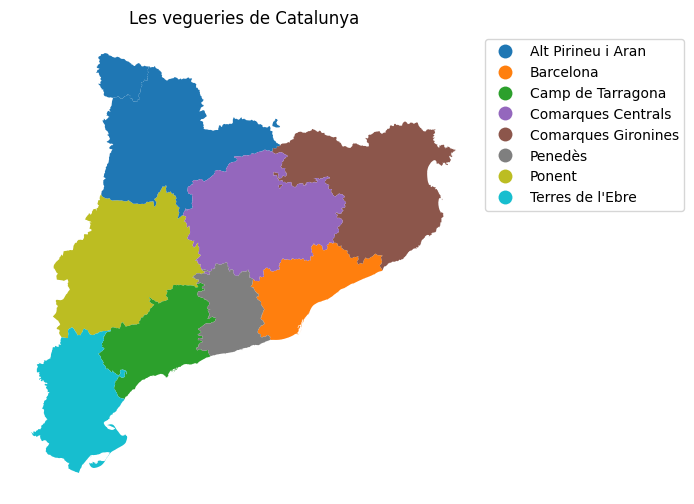

In [86]:
# Plot the data and move the legend
ax = vegueries.plot(
    column='NOMVEGUE',  # Replace with the column used for coloring
    legend=True,           # Add a legend
    legend_kwds={
        'loc': 'upper left',  # Change legend position
        'bbox_to_anchor': (1, 1),  # Fine-tune position (outside the plot)
    },
    figsize=(10, 6)         # Size of the plot
)

# Customize and display the plot

plt.title("Les vegueries de Catalunya")
ax.axis('off')

plt.show()

In [87]:
vegueriesAnt = gpd.read_file(data_dir + "divisions-administratives-v2r1-comarques-500000-20240705.json")
print(vegueriesAnt.columns)

Index(['CODICOMAR', 'NOMCOMAR', 'CAPCOMAR', 'AREAC5000', 'geometry'], dtype='object')


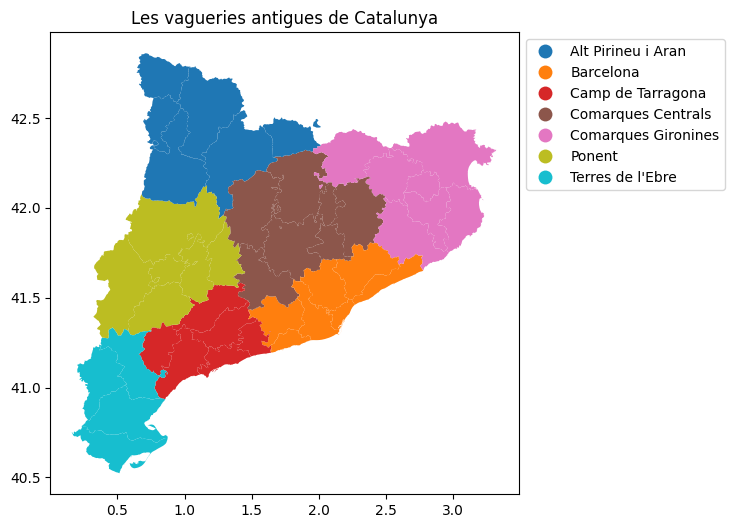

In [88]:
# Plot the data and move the legend
ax1 = vegueriesAnt.plot(
    column='CODICOMAR',  # Replace with the column used for coloring
    legend=True,           # Add a legend
    legend_kwds={
        'loc': 'upper left',  # Change legend position
        'bbox_to_anchor': (1, 1),  # Fine-tune position (outside the plot)
    },
    figsize=(10, 6)         # Size of the plot
)

# Customize and display the plot

plt.title("Les vagueries antigues de Catalunya")
ax.axis('off')

plt.show()

In [89]:
a1986 = pd.read_csv(data_dir + "1986.csv", delimiter=";")

a1986


,Vegueries 1986,Entendre'l,Parlar-lo,Llegir-lo,Escriure'l
0,Barcelona,88.42,57.91,56.86,28.86
1,Alt Pirineu i Aran,95.79,81.90,70.59,35.89
2,Camp de Tarragona,91.23,68.85,64.29,33.80
3,Comarques Centrals,95.44,81.02,72.60,44.49
4,Comarques Gironines,95.11,80.26,70.97,39.75
5,Ponent,96.14,82.39,71.06,36.34
6,Terres de l'Ebre,97.53,83.22,63.20,28.51


In [90]:
a1986.rename(columns ={'Vegueries 1986':'CODICOMAR'}, inplace=True)

a1986

,CODICOMAR,Entendre'l,Parlar-lo,Llegir-lo,Escriure'l
0,Barcelona,88.42,57.91,56.86,28.86
1,Alt Pirineu i Aran,95.79,81.90,70.59,35.89
2,Camp de Tarragona,91.23,68.85,64.29,33.80
3,Comarques Centrals,95.44,81.02,72.60,44.49
4,Comarques Gironines,95.11,80.26,70.97,39.75
5,Ponent,96.14,82.39,71.06,36.34
6,Terres de l'Ebre,97.53,83.22,63.20,28.51


In [91]:
merge1986 = vegueriesAnt.merge(a1986,on='CODICOMAR')
merge1986

,CODICOMAR,NOMCOMAR,CAPCOMAR,AREAC5000,geometry,Entendre'l,Parlar-lo,Llegir-lo,Escriure'l
0,Camp de Tarragona,Alt Camp,vals,537.8597,"MULTIPOLYGON (((1.47594 41.47798, 1.47459 41.4...",91.23,68.85,64.29,33.80
1,Comarques Gironines,Alt Empordà,Figueres,1356.9070,"MULTIPOLYGON (((3.16645 42.11347, 3.16646 42.1...",95.11,80.26,70.97,39.75
2,Barcelona,Alt Penedès,Vilafranca del Penedès,592.5548,"MULTIPOLYGON (((1.64111 41.50667, 1.63295 41.5...",88.42,57.91,56.86,28.86
3,Alt Pirineu i Aran,Alt Urgell,la Seu d'Urgell,1446.6689,"MULTIPOLYGON (((1.31969 41.98228, 1.32097 41.9...",95.79,81.90,70.59,35.89
4,Alt Pirineu i Aran,Alta Ribagorça,el Pont de Suert,427.2234,"MULTIPOLYGON (((0.89632 42.62309, 0.89627 42.6...",95.79,81.90,70.59,35.89
5,Comarques Centrals,Anoia,Igualada,867.0471,"MULTIPOLYGON (((1.4524 41.79846, 1.44551 41.79...",95.44,81.02,72.60,44.49
6,Comarques Centrals,Bages,Manresa,1092.7982,"MULTIPOLYGON (((2.00146 41.96643, 1.99983 41.9...",95.44,81.02,72.60,44.49
7,Camp de Tarragona,Baix Camp,Reus,696.4480,"MULTIPOLYGON (((1.03699 41.05767, 1.03701 41.0...",91.23,68.85,64.29,33.80
8,Terres de l'Ebre,Baix Ebre,Tortosa,1001.9331,"MULTIPOLYGON (((0.77083 40.76315, 0.77095 40.7...",97.53,83.22,63.20,28.51
9,Comarques Gironines,Baix Empordà,la Bisbal d'Empordà,701.1957,"MULTIPOLYGON (((2.98171 41.75729, 2.98172 41.7...",95.11,80.26,70.97,39.75


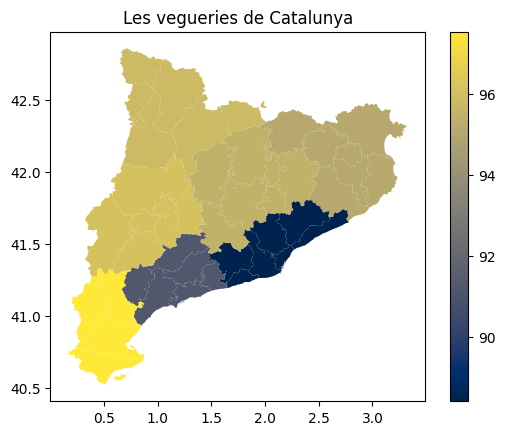

In [95]:
# Plot the data and move the legend
ax1986_1 = merge1986.plot(
    column='Entendre\'l', # Replace with the column used for coloring
    cmap = 'cividis',
    legend=True,           # Add a legend
    
)

# Customize and display the plot

plt.title("Les vegueries de Catalunya")

plt.show()

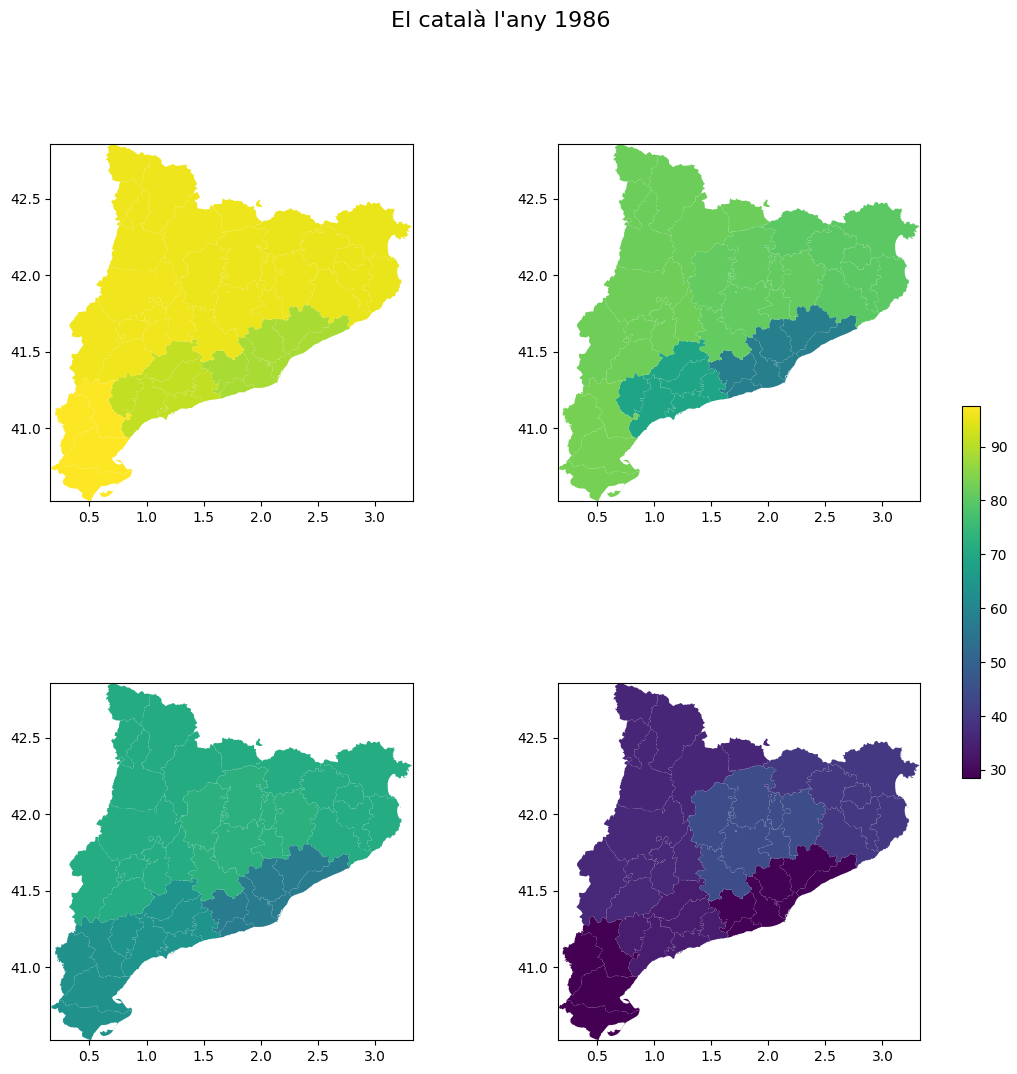

In [99]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Define the global min and max values across all columns for the color scale
vmin = min(merge1986['Entendre\'l'].min(), merge1986['Parlar-lo'].min(), merge1986['Llegir-lo'].min(), merge1986['Escriure\'l'].min())
vmax = max(merge1986['Entendre\'l'].max(), merge1986['Parlar-lo'].max(), merge1986['Llegir-lo'].max(), merge1986['Escriure\'l'].max())

# Create subplots (2 rows, 2 columns)
fig, ax1986 = plt.subplots(2, 2, figsize=(12, 12))

# Plot on each axis without legend (to avoid duplication of legends)
merge1986.plot(
    column='Entendre\'l',  # Replace with the column you want to color by
    cmap='viridis',
    ax=ax1986[0, 0],  # Plot on the first subplot (top-left)
    legend=False,  # Don't show legend here
    vmin=vmin,  # Set the same vmin for all plots
    vmax=vmax   # Set the same vmax for all plots
)
merge1986.plot(
    column='Parlar-lo',  # Replace with the column you want to color by
    cmap='viridis',
    ax=ax1986[0, 1],  # Plot on the second subplot (top-right)
    legend=False,  # Don't show legend here
    vmin=vmin,  # Set the same vmin for all plots
    vmax=vmax   # Set the same vmax for all plots
)
merge1986.plot(
    column='Llegir-lo',  # Replace with the column you want to color by
    cmap='viridis',
    ax=ax1986[1, 0],  # Plot on the third subplot (bottom-left)
    legend=False,  # Don't show legend here
    vmin=vmin,  # Set the same vmin for all plots
    vmax=vmax   # Set the same vmax for all plots
)
merge1986.plot(
    column='Escriure\'l',  # Replace with the column you want to color by
    cmap='viridis',
    ax=ax1986[1, 1],  # Plot on the fourth subplot (bottom-right)
    legend=False,  # Don't show legend here
    vmin=vmin,  # Set the same vmin for all plots
    vmax=vmax   # Set the same vmax for all plots
)

# Create a shared color legend using the first plot (or any plot)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])  # Required to make the ScalarMappable work

# Add colorbar (shared legend) on the side of the plot
fig.colorbar(sm, ax=ax1986, orientation='vertical', fraction=0.02, pad=0.04)

# Set the main title for the figure
fig.suptitle('El català l\'any 1986', fontsize=16)

# Adjust layout to avoid overlapping and to make room for the legend
fig.subplots_adjust(hspace=0.4, wspace=0.4, right=0.85)  # Increase space to the right for the legend

# Optional: set the axis limits to the extent of the data to ensure proper zooming
for ax in ax1986.flatten():
    ax.set_xlim(merge1986.total_bounds[[0, 2]])  # Set the x limits based on data bounds
    ax.set_ylim(merge1986.total_bounds[[1, 3]])  # Set the y limits based on data bounds

# Display the plot
plt.show()
